<a href="https://colab.research.google.com/github/afscomercial/big-data-fundamental/blob/main/assigment-two/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CBD 2214 1 - Big Data Fundamentals Data Storage Networking
## Assignment 2: Classification and semi-supervised learning

Group 2:
* Andrea Franco C0931897
* Andres Salguero C0932873
* Harpreet Kaur C0936410

## I) Business Case Evaluation: Seoul Bike Demand Prediction

**Justification & Motivation:**

The **scope** of this project is to predict the demand of bikes for a shop in the city of Seoul, Korea.

The **motivation** behind this project is to help the bike store to predict how many bikes should have available for rent depending on the weather condition.

In order to know which business challenges the analysis will tackle, we can stablish certain key points that will help us to guide the data analysis in a effective way and evaluate the success of our model:

**The problem** we will be tackling is the inconsistent bike availability due to unpredictable demand which leads to lost revenue (bikes unavailable during peak times) and customer dissatisfaction (unavailable bikes or too few choices).

**The solution** is the development of a bike rental demand prediction model using historical rental data and available weather information to train the model.

**Business Challenges Tackled:**

The specific business challenges that we will be helping to tackle are:

* **Demand forecasting**: Classify whether demand will be above or below the mean, allowing for better preparation.
* **Inventory management**: Ensure optimal bike availability based on predicted demand classification.
* **Customer experience**: Improve customer satisfaction by minimizing wait times and ensuring an adequate number of bikes are available.

**Goals:**

The goals that we will be targeting are:

* **Reduce lost revenue:** Make accurate predictions of peak demand periods to ensure enough bikes are available for rent. 
* **Improve customer satisfaction:** Minimize wait times and ensure an adequate number of bikes are available when needed.
* **Optimize operational efficiency:** Reduce unnecessary bike replenishment, saving time and resources.


**Key Performance Indicators (KPIs):**

Once the model has been deployed, the following KPIs could be proposed to evaluate the performance of the solution, creating a new phase of the project in which the dataset is fed with new data, and re-trained to give better results.

* **Bike rental revenue:** Track changes in revenue after implementing the prediction model.
* **Prediction accuracy:** Measure the accuracy of the classification model in predicting above or below mean bike rentals.
* **Bike availability:** Monitor the difference between the number of bikes available for rent and the rent demand, especially during peak hours.
* **Customer satisfaction:** Conduct surveys to measure customer experience.
* **Operational efficiency:** Track the time and resources spent on replenish bikes across locations.



## II) Data Identification

The next phase of the project is data identification which involves describing the specific datasets required to build our bike rental demand prediction model. As this project will focus on identifying data sources that provide historical information on bike rentals and relevant weather conditions in Seoul, Korea, the "Seoul Bike Sharing Demand Prediction" (E et al., 2020) will have enough data to take a first approach into the data analysis and development of our classification model.

This dataset provide us with information about historical public bike rental from the government of Korea and weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall). 

This data was obtained from [Kaggle Website](https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction) but the acknowledgments cite the original paper from which it was obtained at the Mendeley database and the original paper at Science Direct (E et al., 2020).

In order to create a robust model, other types of dataset could be used for a second approach of the problem, getting data from both internal an external data sources, being internal data those coming from the bike rental companies interested in getting a better performance for their business, for instance:

**Internal Data Sources:** 
    
* Daily or hourly rental records
* Bike type (e.g., road bike, mountain bike)
* Pickup and drop-off locations
* Customer information (optional, anonymized)

**External Data Sources:**

Publicly available weather datasets for Seoul, Korea. Potential sources include:

* South Korean national weather service websites
* Open-source weather data repositories like [National Oceanic and Atmospheric Administration (NOAA) ](https://www.noaa.gov/climate)
* Weather APIs offered by private companies

Depending on the chosen data sources, it might be need to integrate data from multiple sources and make some preprocessing to ensure consistency before feeding it into our model.



## III) Data Acquisition and Filtering

In this stage, the main objective is to acquire the necessary data and filter it to ensure quality and relevance. The process involves sourcing the data from identified internal and external sources,  removing noise and inconsistencies, and filtering it to retain only the data pertinent to the bike demand prediction model.

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
# semi-supervised learning
from sklearn import semi_supervised
import warnings
 
warnings.filterwarnings('ignore')

In [104]:
df = pd.read_csv("https://raw.githubusercontent.com/afscomercial/big-data-fundamental/main/assigment-one/SeoulBikeData.csv", encoding='unicode_escape')

In [105]:
df.head()

Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0  01/12/2017                254     0         -5.2        37         2.2   
1  01/12/2017                204     1         -5.5        38         0.8   
2  01/12/2017                173     2         -6.0        39         1.0   
3  01/12/2017                107     3         -6.2        40         0.9   
4  01/12/2017                 78     4         -6.0        36         2.3   

   Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning Day  
0  Winter  No Holiday             Yes  
1  Winter  No Holiday             Yes  
2  Winter  No Holiday             Yes  
3  Winter  No Holiday             Yes  
4  Winter  No Holiday             Yes

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ 

## IV) Data Extraction

The Data Extraction stage focuses on extracting and transforming data from various sources into a format suitable for the Big Data solution. This involves handling different data formats and ensuring compatibility with the analytics tools used for further processing and analysis. The extraction process must accommodate the diverse nature of data, especially when dealing with external sources, ensuring it is transformed into a structured and consistent format.

To transform data into a consistent format, the date column will be converted to a datetime object.
This allows to efficiently handle, manipulate, and extract useful features from the date information.

In [107]:
# Convert 'Date' column to datetime with dayfirst=True
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

For this stage, we decided to remove special characters from dataset labels to simplify the referencing in code, ensuring compatibility with various tools and systems, improving readability and maintainability, and avoids potential issues with database integration and data analysis operations.

In [108]:
# Rename columns to remove special characters
df.rename(columns={
    'Temperature(°C)': 'Temperature',
    'Humidity(%)': 'Humidity',
    'Wind speed (m/s)': 'Wind speed',
    'Visibility (10m)': 'Visibility',
    'Dew point temperature(°C)': 'Dew point temperature',
    'Solar Radiation (MJ/m2)': 'Solar Radiation',
    'Rainfall(mm)': 'Rainfall',
    'Snowfall (cm)': 'Snowfall'
}, inplace=True)

Also for this case in particular that a classification algorithm will be used, it is needed to do feature engineering in order to obtain a target feature with classes instead of continuos values.

In [109]:
df['Rented Bike Count'].mean()

704.6020547945205

In [110]:
# Create a new column 'Above_700' with 1 if 'Values' > 700, otherwise 0
df['Rented above mean'] = df['Rented Bike Count'].apply(lambda x: 1 if x > 700 else 0)
df

Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0    2017-12-01                254     0         -5.2        37         2.2   
1    2017-12-01                204     1         -5.5        38         0.8   
2    2017-12-01                173     2         -6.0        39         1.0   
3    2017-12-01                107     3         -6.2        40         0.9   
4    2017-12-01                 78     4         -6.0        36         2.3   
...         ...                ...   ...          ...       ...         ...   
8755 2018-11-30               1003    19          4.2        34         2.6   
8756 2018-11-30                764    20          3.4        37         2.3   
8757 2018-11-30                694    21          2.6        39         0.3   
8758 2018-11-30                712    22          2.1        41         1.0   
8759 2018-11-30                584    23          1.9        43         1.3   

      Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0           2000                  -17.6              0.0       0.0       0.0   
1           2000                  -17.6              0.0       0.0       0.0   
2           2000                  -17.7              0.0       0.0       0.0   
3           2000                  -17.6              0.0       0.0       0.0   
4           2000                  -18.6              0.0       0.0       0.0   
...          ...                    ...              ...       ...       ...   
8755        1894                  -10.3              0.0       0.0       0.0   
8756        2000                   -9.9              0.0       0.0       0.0   
8757        1968                   -9.9              0.0       0.0       0.0   
8758        1859                   -9.8              0.0       0.0       0.0   
8759        1909                   -9.3              0.0       0.0       0.0   

     Seasons     Holiday Functioning Day  Rented above mean  
0     Winter  No Holiday             Yes                  0  
1     Winter  No Holiday             Yes                  0  
2     Winter  No Holiday             Yes                  0  
3     Winter  No Holiday             Yes                  0  
4     Winter  No Holiday             Yes                  0  
...      ...         ...             ...                ...  
8755  Autumn  No Holiday             Yes                  1  
8756  Autumn  No Holiday             Yes                  1  
8757  Autumn  No Holiday             Yes                  0  
8758  Autumn  No Holiday             Yes                  1  
8759  Autumn  No Holiday             Yes                  0  

[8760 rows x 15 columns]

## V) Data cleansing and validation

This process helps in removing inconsistent data from our dataset so that we can gain better insights on our data which could lead to better analysis.For this we will use functions like isnull, duplicated() so that if data has any consistency it can be removed.in this dataset we did not drop any value because all the values are useful in this dataset for our analysis. Also we will transform our qualitative feature to quantitative features,these features would be Seasons,Holiday,Function Day .In order to validate our data to make sure that whether it is according to the structure that we need, to check whether it will require any removal of the inaccurate data and to check the relationship within the features in our dataset. To ensure this we had to remove the missing value or duplicate values in our dataset using nunique() function.

In [111]:
# checking for null values
df.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
Rented above mean        0
dtype: int64

*** As there are no null values in our dataset we don't need to drop any values

In [112]:
df.nunique()

Date                      365
Rented Bike Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind speed                 65
Visibility               1789
Dew point temperature     556
Solar Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning Day             2
Rented above mean           2
dtype: int64

There isn't any feature only with one class as well, so we don't need to eliminate based on this requirement

### Converting qualitative features into quantitative
  Here Seasons, Holiday and Functioning Day features are converted into Quantitative feature.



In [113]:
numerical_df = pd.DataFrame(df)

In [114]:
le = LabelEncoder()
ohe = OneHotEncoder(sparse_output=False)

In [115]:
# Perform one-hot encoding
one_hot = pd.get_dummies(df['Seasons'], prefix='Seasons', dtype=int)

# Concatenate the original DataFrame with the one-hot encoded columns
numerical_df = pd.concat([numerical_df, one_hot], axis=1)

# Drop the original 'Labels' column if you no longer need it
numerical_df.drop('Seasons', axis=1, inplace=True)

numerical_df

Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0    2017-12-01                254     0         -5.2        37         2.2   
1    2017-12-01                204     1         -5.5        38         0.8   
2    2017-12-01                173     2         -6.0        39         1.0   
3    2017-12-01                107     3         -6.2        40         0.9   
4    2017-12-01                 78     4         -6.0        36         2.3   
...         ...                ...   ...          ...       ...         ...   
8755 2018-11-30               1003    19          4.2        34         2.6   
8756 2018-11-30                764    20          3.4        37         2.3   
8757 2018-11-30                694    21          2.6        39         0.3   
8758 2018-11-30                712    22          2.1        41         1.0   
8759 2018-11-30                584    23          1.9        43         1.3   

      Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0           2000                  -17.6              0.0       0.0       0.0   
1           2000                  -17.6              0.0       0.0       0.0   
2           2000                  -17.7              0.0       0.0       0.0   
3           2000                  -17.6              0.0       0.0       0.0   
4           2000                  -18.6              0.0       0.0       0.0   
...          ...                    ...              ...       ...       ...   
8755        1894                  -10.3              0.0       0.0       0.0   
8756        2000                   -9.9              0.0       0.0       0.0   
8757        1968                   -9.9              0.0       0.0       0.0   
8758        1859                   -9.8              0.0       0.0       0.0   
8759        1909                   -9.3              0.0       0.0       0.0   

         Holiday Functioning Day  Rented above mean  Seasons_Autumn  \
0     No Holiday             Yes                  0               0   
1     No Holiday             Yes                  0               0   
2     No Holiday             Yes                  0               0   
3     No Holiday             Yes                  0               0   
4     No Holiday             Yes                  0               0   
...          ...             ...                ...             ...   
8755  No Holiday             Yes                  1               1   
8756  No Holiday             Yes                  1               1   
8757  No Holiday             Yes                  0               1   
8758  No Holiday             Yes                  1               1   
8759  No Holiday             Yes                  0               1   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  
0                  0               0               1  
1                  0               0               1  
2                  0               0               1  
3                  0               0               1  
4                  0               0               1  
...              ...             ...             ...  
8755               0               0               0  
8756               0               0               0  
8757               0               0               0  
8758               0               0               0  
8759               0               0               0  

[8760 rows x 18 columns]

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Solar Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [117]:
# converting Holiday type
numerical_df['Holiday'] = le.fit_transform(numerical_df['Holiday'])
label_mapping = dict(enumerate(le.classes_))
print(label_mapping)



{0: 'Holiday', 1: 'No Holiday'}


In [118]:
# converting Functioning Day type
numerical_df['Functioning Day'] = le.fit_transform(numerical_df['Functioning Day'])
label_mapping = dict(enumerate(le.classes_))
print(label_mapping)


{0: 'No', 1: 'Yes'}


## VI) Data Representation and Aggregation

This process include representing and aggregating our data. Data aggregation is basically a process to combine multiple dataset into one single dataset so that it will make our analysis easier to work with. This step is important as it processes the large amount of data in less time. However in our case this step will not be included as we do not have any multiple data set in our analysis and the data is in the format of csv file.

## VII) Data analysis

### 1. Target variable Exploration

The primary objective of this project is to predict the demand for bikes at a rental shop in Seoul, Korea. The target variable, Rented Above mean, represents the times when the number of rented bikes was above the mean in that sample. Accurate predictions of this target variable will help the bike rental shop manage inventory more efficiently, ensuring that enough bikes are available during peak times and reducing instances of unavailability. This, in turn, will help increase revenue and improve customer satisfaction.

In [120]:
numerical_df['Rented above mean'].describe()

count    8760.000000
mean        0.403311
std         0.490590
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Rented above mean, dtype: float64

#### Time series analysis of Rented Bike Count

The time series analysis of the target variable, Rented above mean, will provide insights into the trends, seasonality, and patterns in bike rentals over time. This analysis will help identify the factors that influence bike rental demand, such as season and time of day. Understanding these patterns will enable the development of a predictive model that can accurately forecast bike rental demand.

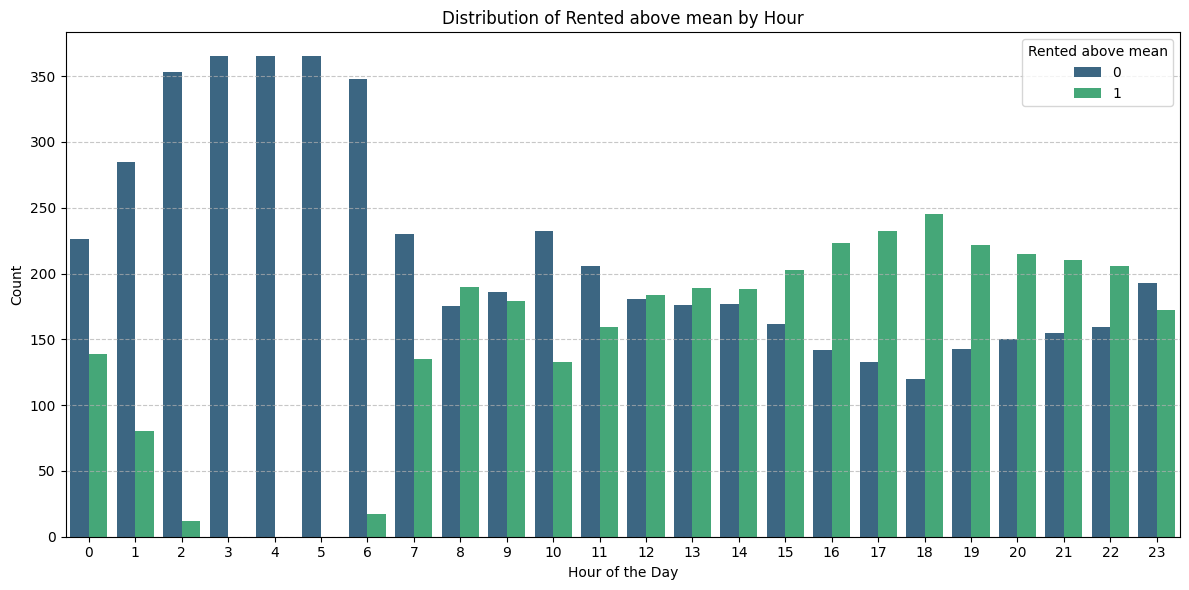

In [121]:
# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Hour', hue='Rented above mean', palette='viridis')

plt.title('Distribution of Rented above mean by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Rented above mean', loc='upper right')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

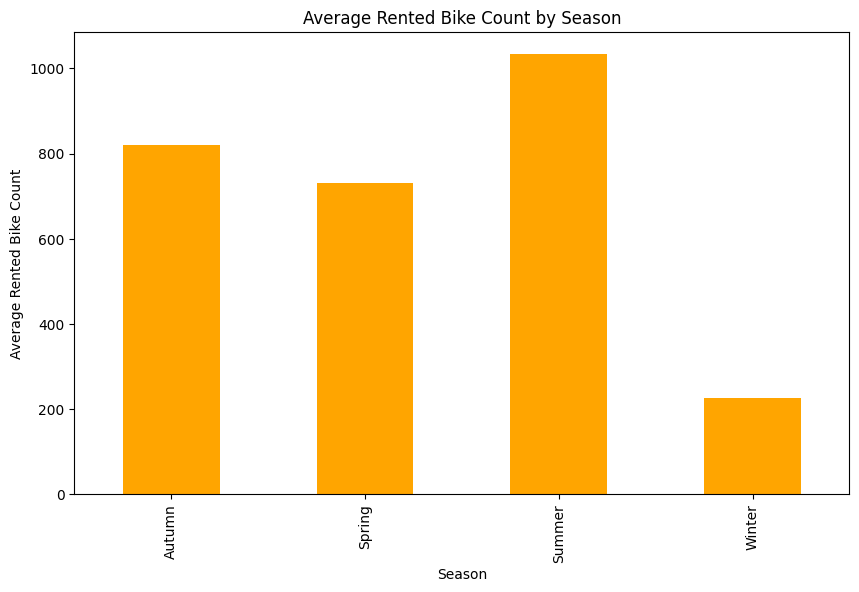

In [122]:
# Seasonal trends
seasonal_counts =df.groupby('Seasons')['Rented Bike Count'].mean()

plt.figure(figsize=(10, 6))
seasonal_counts.plot(kind='bar', color='orange')
plt.title('Average Rented Bike Count by Season')
plt.xlabel('Season')
plt.ylabel('Average Rented Bike Count')
plt.show()

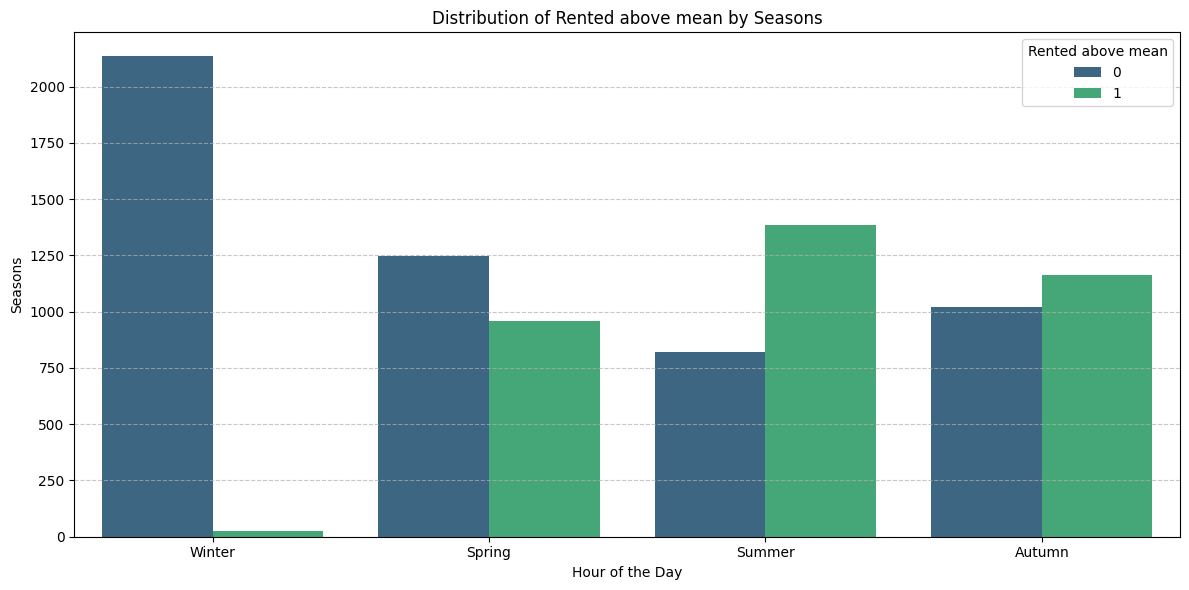

In [123]:
# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Seasons', hue='Rented above mean', palette='viridis')

plt.title('Distribution of Rented above mean by Seasons')
plt.xlabel('Hour of the Day')
plt.ylabel('Seasons')
plt.legend(title='Rented above mean', loc='upper right')
plt.xticks(range(0, 4))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Examine the distribution of the target variable Rented above mean to understand the balance between the classes (0 and 1).

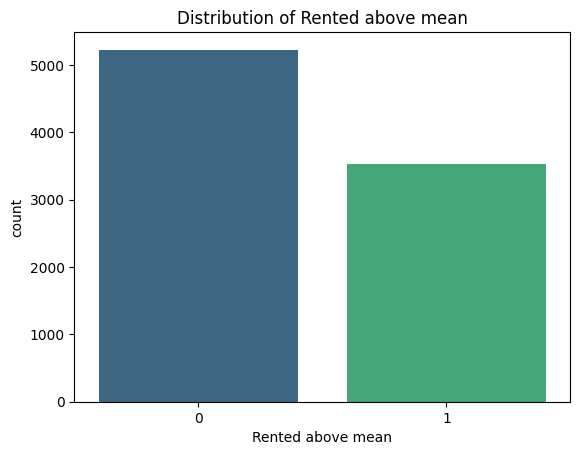

Rented above mean
0    0.596689
1    0.403311
Name: proportion, dtype: float64


In [124]:
sns.countplot(x='Rented above mean', data=df, palette='viridis')
plt.title('Distribution of Rented above mean')
plt.show()

print(df['Rented above mean'].value_counts(normalize=True))

They have a similar proportion, although the number of times that there wasn't a peak time is greater than the ones that it did.

### Handling outliers

As our model has a discrete variable, there are no outliers in the target feature

### 2. Numerical variable exploration

On the other hand, we can search for insights in the numerical variables using the describe method to obtain statistical information about them and a correlation heatmap to see the relations between features.

In [125]:
# List of numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('Rented Bike Count') 
numerical_cols.remove('Rented above mean') 

# Summary statistics of numerical variables
print(df[numerical_cols].describe())

              Hour  Temperature     Humidity   Wind speed   Visibility  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean     11.500000    12.882922    58.226256     1.724909  1436.825799   
std       6.922582    11.944825    20.362413     1.036300   608.298712   
min       0.000000   -17.800000     0.000000     0.000000    27.000000   
25%       5.750000     3.500000    42.000000     0.900000   940.000000   
50%      11.500000    13.700000    57.000000     1.500000  1698.000000   
75%      17.250000    22.500000    74.000000     2.300000  2000.000000   
max      23.000000    39.400000    98.000000     7.400000  2000.000000   

       Dew point temperature  Solar Radiation     Rainfall     Snowfall  
count            8760.000000      8760.000000  8760.000000  8760.000000  
mean                4.073813         0.569111     0.148687     0.075068  
std                13.060369         0.868746     1.128193     0.436746  
min               -30.600000         

It is also important to plot the values of the numerical variables with those same variables, as it may reveal some type of relation (linear, polinomial)

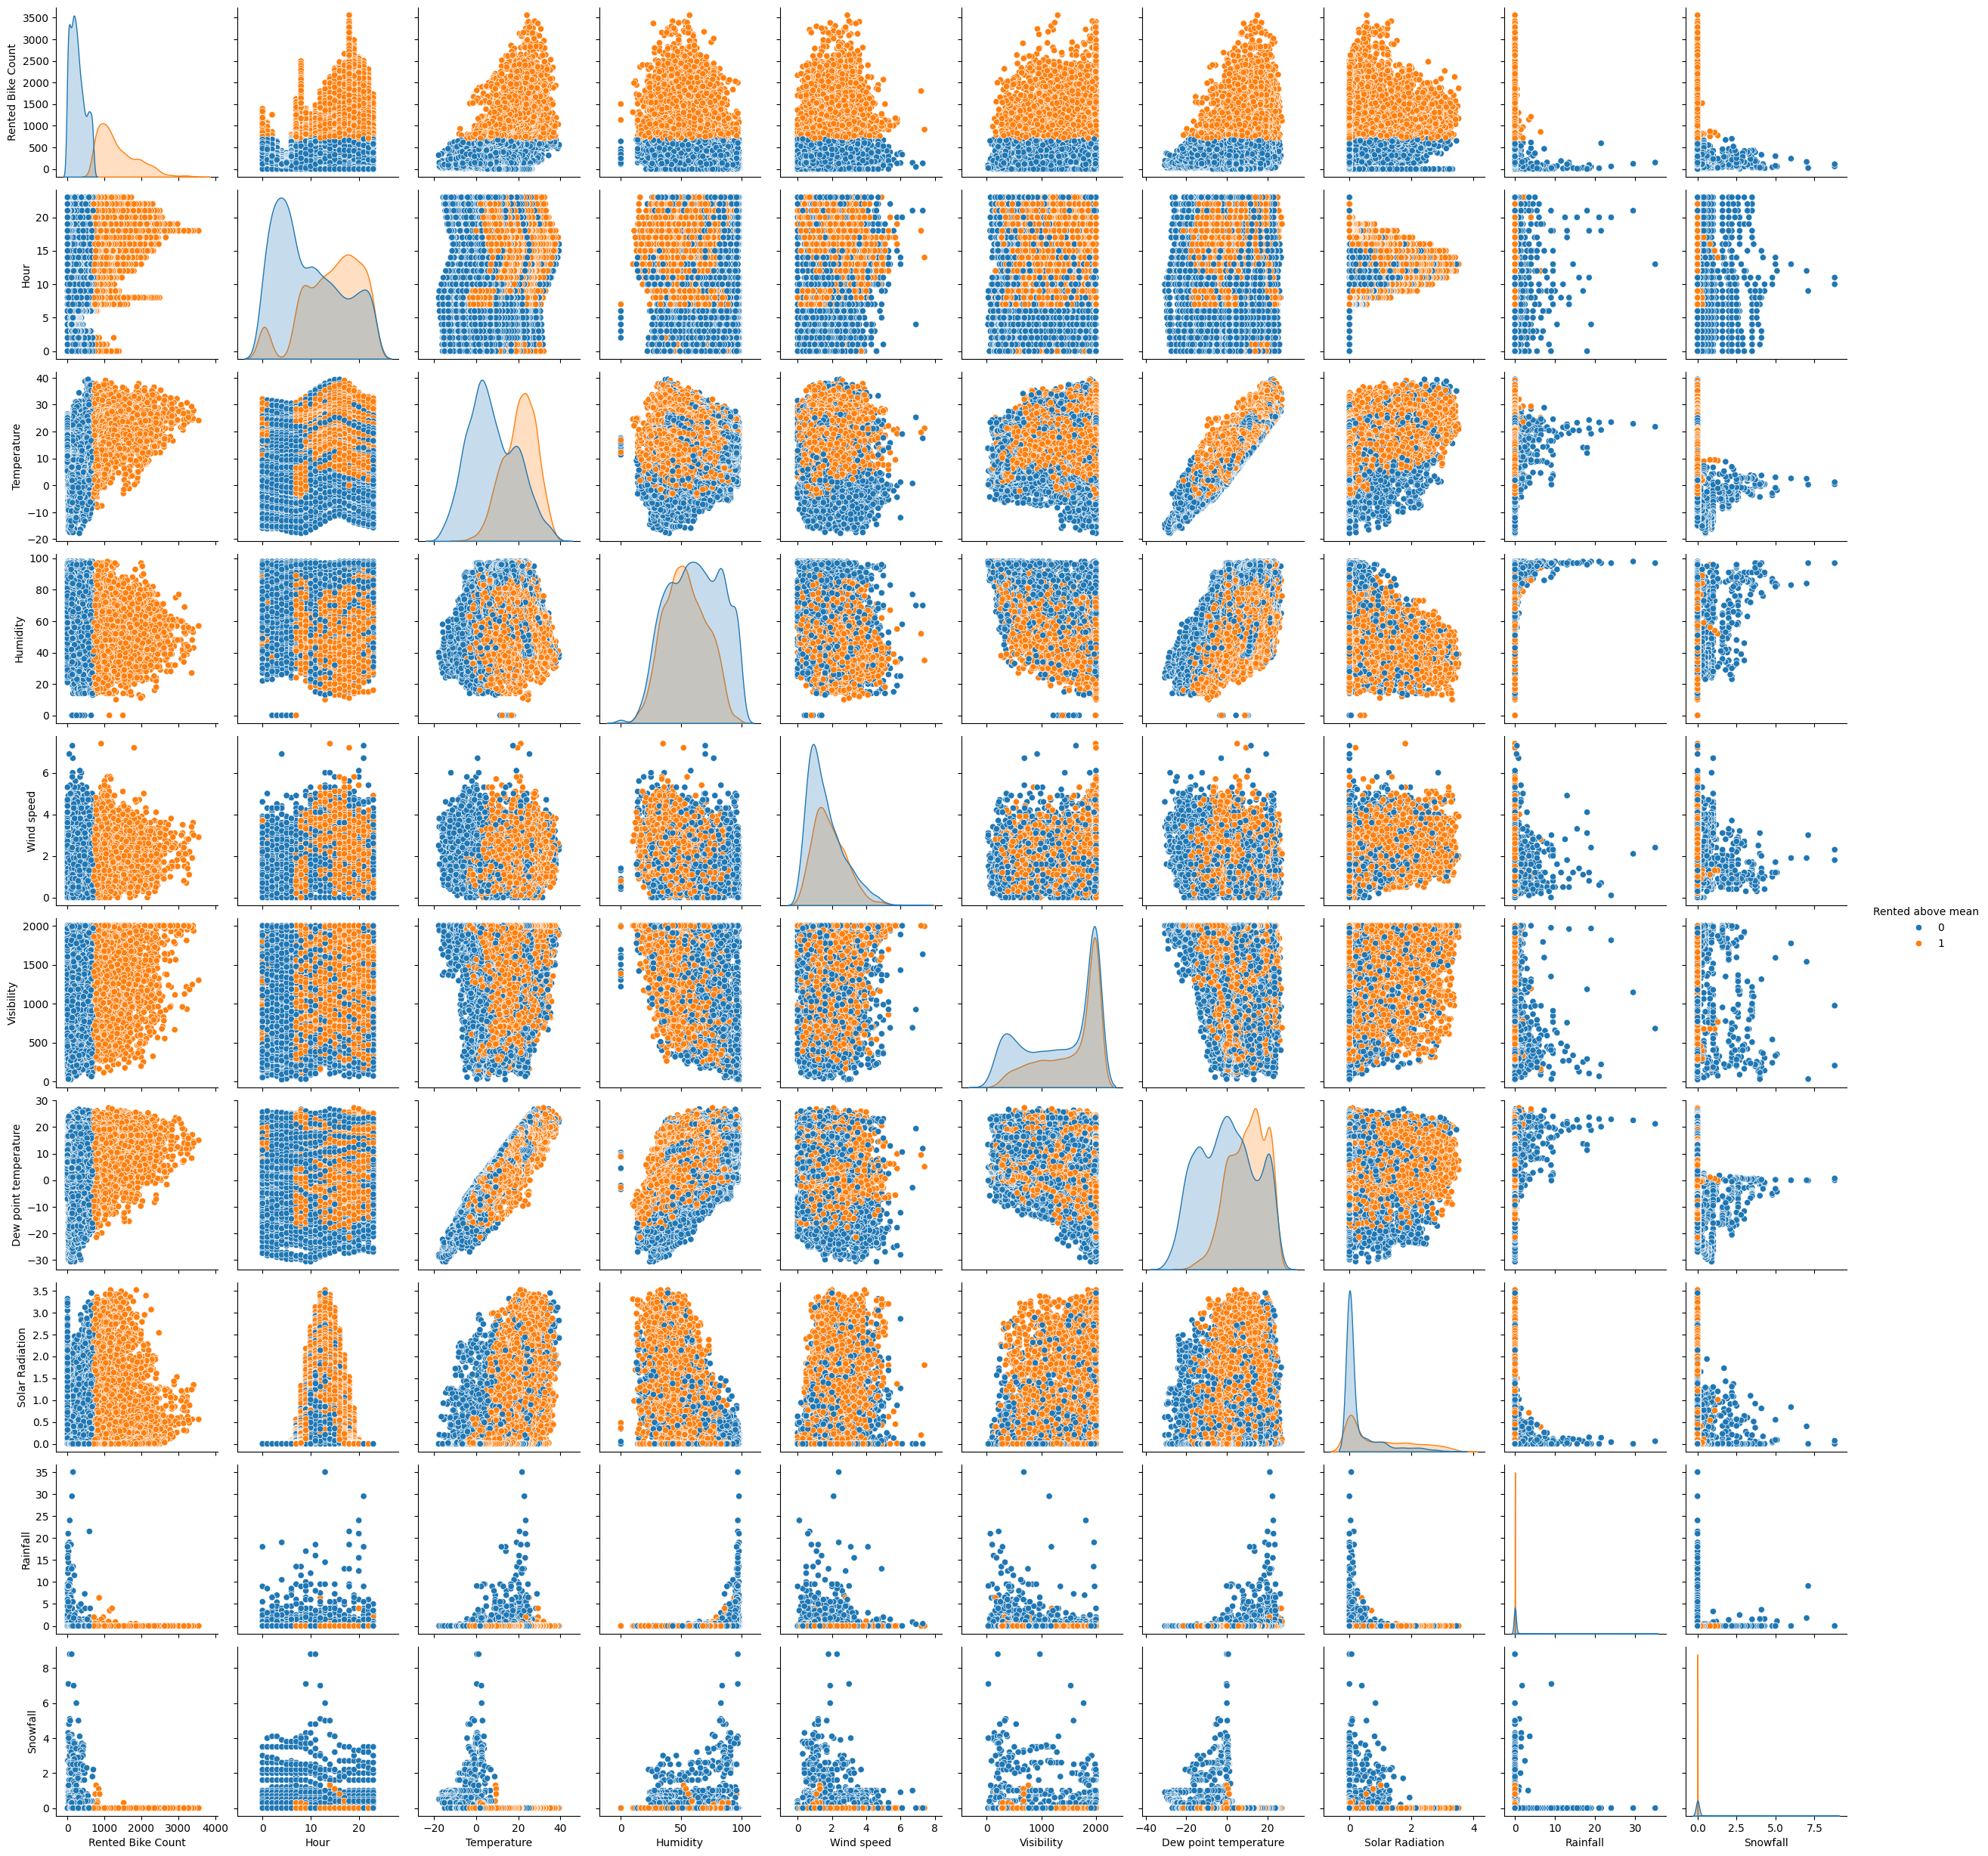

In [126]:
# Create the default pairplot
sns.pairplot(df, hue= 'Rented above mean')

### 3. Finding the correlation between variables

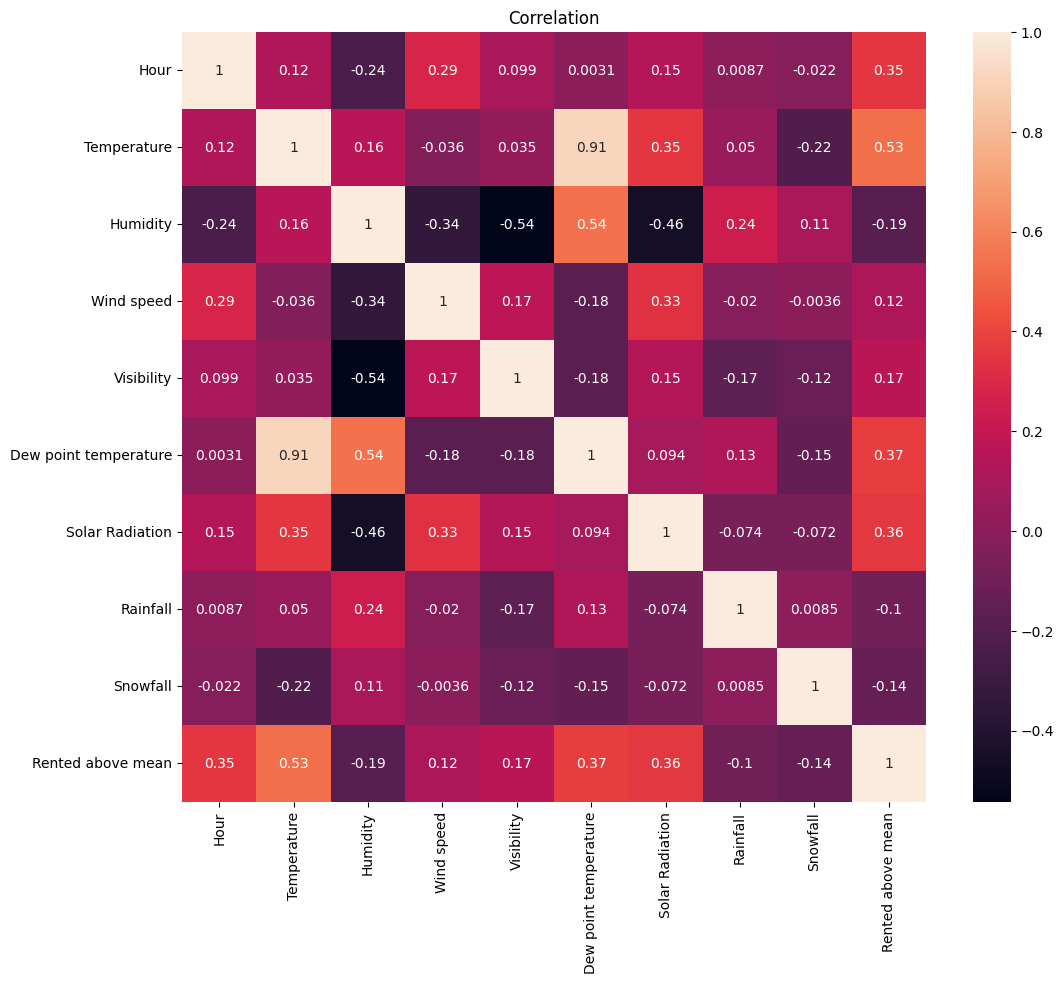

In [127]:
# correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop('Rented Bike Count', axis=1).corr(numeric_only=True), annot=True)
plt.title('Correlation')
plt.show()


The feature that has the highest positive correlation with the target feature is Temperature and the highest negative correlation is Humidity. The feature with the lowest correlation with this feature is Rainfall

### 4. Normalizing values

We use standard scaler for normalizing the numerical features, except for the hour and the Seasons, Functioning day or Holiday that were already encoded and not included in the variable Numerical_cols, as they might lose their discrete nature when normalized.

In [128]:
# Standard Scaling for numerical features
scaler = StandardScaler()
numerical_cols.remove('Hour') 
numerical_df[numerical_cols] = scaler.fit_transform(numerical_df[numerical_cols])

In [129]:
numerical_df.describe().round(2)

Date  Rented Bike Count     Hour  Temperature  \
count                           8760            8760.00  8760.00      8760.00   
mean   2018-05-31 23:59:59.999999744             704.60    11.50         0.00   
min              2017-12-01 00:00:00               0.00     0.00        -2.57   
25%              2018-03-02 00:00:00             191.00     5.75        -0.79   
50%              2018-06-01 00:00:00             504.50    11.50         0.07   
75%              2018-08-31 00:00:00            1065.25    17.25         0.81   
max              2018-11-30 00:00:00            3556.00    23.00         2.22   
std                              NaN             645.00     6.92         1.00   

       Humidity  Wind speed  Visibility  Dew point temperature  \
count   8760.00     8760.00     8760.00                8760.00   
mean       0.00       -0.00       -0.00                  -0.00   
min       -2.86       -1.66       -2.32                  -2.66   
25%       -0.80       -0.80       -0.82                  -0.67   
50%       -0.06       -0.22        0.43                   0.08   
75%        0.77        0.55        0.93                   0.82   
max        1.95        5.48        0.93                   1.77   
std        1.00        1.00        1.00                   1.00   

       Solar Radiation  Rainfall  Snowfall  Holiday  Functioning Day  \
count          8760.00   8760.00   8760.00  8760.00          8760.00   
mean              0.00     -0.00      0.00     0.95             0.97   
min              -0.66     -0.13     -0.17     0.00             0.00   
25%              -0.66     -0.13     -0.17     1.00             1.00   
50%              -0.64     -0.13     -0.17     1.00             1.00   
75%               0.42     -0.13     -0.17     1.00             1.00   
max               3.40     30.89     19.98     1.00             1.00   
std               1.00      1.00      1.00     0.22             0.18   

       Rented above mean  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
count            8760.00         8760.00         8760.00         8760.00   
mean                0.40            0.25            0.25            0.25   
min                 0.00            0.00            0.00            0.00   
25%                 0.00            0.00            0.00            0.00   
50%                 0.00            0.00            0.00            0.00   
75%                 1.00            0.00            1.00            1.00   
max                 1.00            1.00            1.00            1.00   
std                 0.49            0.43            0.43            0.43   

       Seasons_Winter  
count         8760.00  
mean             0.25  
min              0.00  
25%              0.00  
50%              0.00  
75%              0.00  
max              1.00  
std              0.43

### 5. Splitting data intro train and test subsets

Once the data is normalized, we proceed to split it the features in a X variable and the target feature in a Y variable. After this, we can split the two parameters into the train and test subsets

In [130]:
y = numerical_df['Rented above mean']
y

0       0
1       0
2       0
3       0
4       0
       ..
8755    1
8756    1
8757    0
8758    1
8759    0
Name: Rented above mean, Length: 8760, dtype: int64

We also drop the Date feature as it won't be useful as an input for the classification model

In [131]:
X = numerical_df.drop(columns=['Rented Bike Count', 'Rented above mean', 'Date'])
X

Hour  Temperature  Humidity  Wind speed  Visibility  \
0        0    -1.513957 -1.042483    0.458476    0.925871   
1        1    -1.539074 -0.993370   -0.892561    0.925871   
2        2    -1.580936 -0.944257   -0.699556    0.925871   
3        3    -1.597680 -0.895144   -0.796059    0.925871   
4        4    -1.580936 -1.091596    0.554978    0.925871   
...    ...          ...       ...         ...         ...   
8755    19    -0.726961 -1.189822    0.844486    0.751605   
8756    20    -0.793939 -1.042483    0.554978    0.925871   
8757    21    -0.860918 -0.944257   -1.375075    0.873263   
8758    22    -0.902779 -0.846031   -0.699556    0.694064   
8759    23    -0.919524 -0.747806   -0.410048    0.776265   

      Dew point temperature  Solar Radiation  Rainfall  Snowfall  Holiday  \
0                 -1.659605        -0.655132   -0.1318 -0.171891        1   
1                 -1.659605        -0.655132   -0.1318 -0.171891        1   
2                 -1.667262        -0.655132   -0.1318 -0.171891        1   
3                 -1.659605        -0.655132   -0.1318 -0.171891        1   
4                 -1.736177        -0.655132   -0.1318 -0.171891        1   
...                     ...              ...       ...       ...      ...   
8755              -1.100630        -0.655132   -0.1318 -0.171891        1   
8756              -1.070001        -0.655132   -0.1318 -0.171891        1   
8757              -1.070001        -0.655132   -0.1318 -0.171891        1   
8758              -1.062344        -0.655132   -0.1318 -0.171891        1   
8759              -1.024058        -0.655132   -0.1318 -0.171891        1   

      Functioning Day  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
0                   1               0               0               0   
1                   1               0               0               0   
2                   1               0               0               0   
3                   1               0               0               0   
4                   1               0               0               0   
...               ...             ...             ...             ...   
8755                1               1               0               0   
8756                1               1               0               0   
8757                1               1               0               0   
8758                1               1               0               0   
8759                1               1               0               0   

      Seasons_Winter  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
8755               0  
8756               0  
8757               0  
8758               0  
8759               0  

[8760 rows x 15 columns]

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [133]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5869, 15) (5869,)
(2891, 15) (2891,)


### 6. Build a machine learning model

We can define a function to use in our classification models to plot the confusion matrix:

In [134]:
# Compute confusion matrix
def plot_confusion_matrix(predictions, name, accuracy, report, y_test=y_test):
    if name == 'Label Propagation':
        cm = confusion_matrix(predictions, y_test)
    
    cm = confusion_matrix(y_test, predictions)

    print(f"{name} Accuracy: {accuracy:.2f}\n")
    print(f"Classification Report for {name}:\n{report}\n")
    print(f"Confusion Matrix for {name}:\n{cm}\n")

    # Plot confusion matrix
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
    cm_display.plot()
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

#### Supervised models

#### Logistic Regression


Logistic regression is a statistical technique used for binary classification applications. It uses a logistic function, which yields values between 0 and 1, to predict the likelihood that a given input belongs to a specific class. The model estimates the logistic function's parameters using maximum likelihood estimation, enabling it to manage linear decision boundaries well. While its main application is binary classification, one-vs-rest and similar techniques can expand it to multiclass issues.

Logistic Regression Accuracy: 0.86

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1757
           1       0.82      0.82      0.82      1134

    accuracy                           0.86      2891
   macro avg       0.85      0.85      0.85      2891
weighted avg       0.86      0.86      0.86      2891


Confusion Matrix for Logistic Regression:
[[1558  199]
 [ 202  932]]



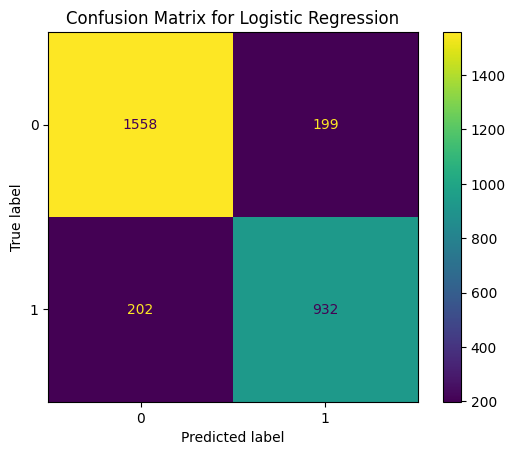

In [135]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
# accuracy
lr_accuracy = accuracy_score(y_test, lr_pred)
# Generate classification report
lr_report = classification_report(y_test, lr_pred)

plot_confusion_matrix(lr_pred, "Logistic Regression", lr_accuracy, lr_report)

#### Support Vector Machine


 SVM is an effective supervised learning algorithm that can be applied to regression and classification problems. It maximizes the margin between the nearest points of the classes (support vectors) by identifying the hyperplane in a high-dimensional space that best divides data points of various classes. By using kernel functions, which implicitly transfer inputs into higher-dimensional feature spaces, SVMs can be modified for nonlinear classification.

Support Vector Machine Accuracy: 0.85

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1757
           1       0.81      0.81      0.81      1134

    accuracy                           0.85      2891
   macro avg       0.84      0.84      0.84      2891
weighted avg       0.85      0.85      0.85      2891


Confusion Matrix for Support Vector Machine:
[[1543  214]
 [ 219  915]]



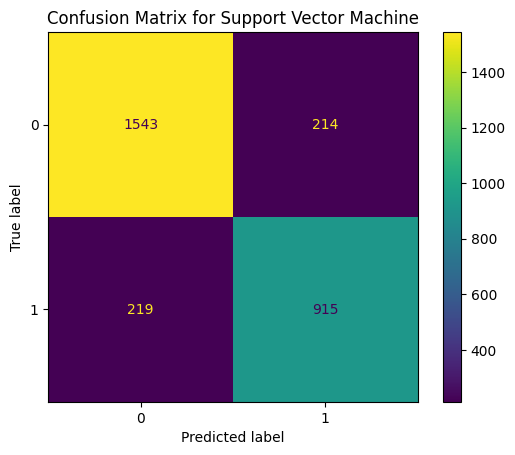

In [136]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_pred)
# Generate classification report
svm_report = classification_report(y_test, svm_pred)

plot_confusion_matrix(svm_pred, "Support Vector Machine", svm_accuracy, svm_report)

#### Decision Tree

 Recursively dividing data according to feature values, decision trees are understandable and comprehensible categorization models that provide a structure akin to a tree. Every leaf node represents a class label, every branch reflects the decision's result, and every internal node represents a choice based on a feature. Decision trees are prone to overfitting if improperly pruned, yet they can easily handle both numerical and categorical data.

Decision Tree Accuracy: 0.89

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1757
           1       0.86      0.87      0.86      1134

    accuracy                           0.89      2891
   macro avg       0.89      0.89      0.89      2891
weighted avg       0.89      0.89      0.89      2891


Confusion Matrix for Decision Tree:
[[1597  160]
 [ 151  983]]



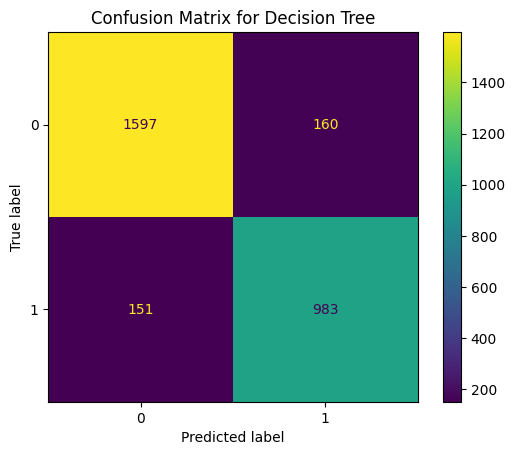

In [137]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
# Generate classification report
dt_report = classification_report(y_test, dt_pred)

plot_confusion_matrix(dt_pred, "Decision Tree", dt_accuracy, dt_report)

#### Random Forest Classifier

 Numerous decision trees are constructed using the Random Forest ensemble learning technique to increase accuracy and resilience, and their predictions are combined. Using features randomness and bootstrap aggregation (bagging), random forests lessen the variance of individual trees and improve generalization. This approach is far more efficient when dealing with larger datasets and reducing overfitting than using a single decision tree.

Random Forest Accuracy: 0.92

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1757
           1       0.89      0.90      0.89      1134

    accuracy                           0.92      2891
   macro avg       0.91      0.91      0.91      2891
weighted avg       0.92      0.92      0.92      2891


Confusion Matrix for Random Forest:
[[1635  122]
 [ 118 1016]]



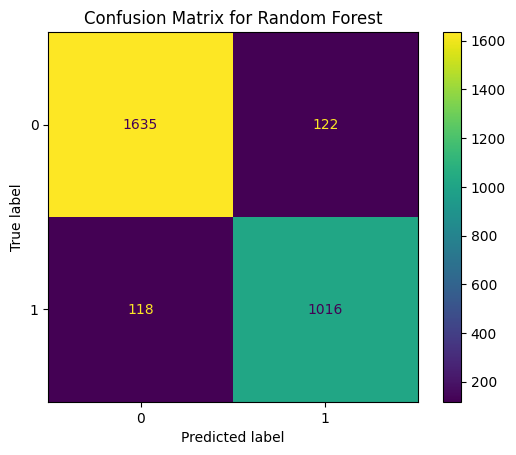

In [138]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
# accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
# Generate classification report
rf_report = classification_report(y_test, rf_pred)

plot_confusion_matrix(rf_pred, "Random Forest", rf_accuracy, rf_report)

#### k-Nearest Neighbors


 KNN is an instance-based learning technique that is straightforward and uses the majority class of its closest neighbours in the feature space to classify data points. It locates the k nearest neighbours using a distance metric, like the Euclidean distance and then allocates the input data item to the neighbour with the highest class. KNN is simple to comprehend and use, but it may be computationally costly for large datasets.

k-Nearest Neighbors Accuracy: 0.89

Classification Report for k-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1757
           1       0.84      0.90      0.87      1134

    accuracy                           0.89      2891
   macro avg       0.89      0.90      0.89      2891
weighted avg       0.90      0.89      0.89      2891


Confusion Matrix for k-Nearest Neighbors:
[[1558  199]
 [ 109 1025]]



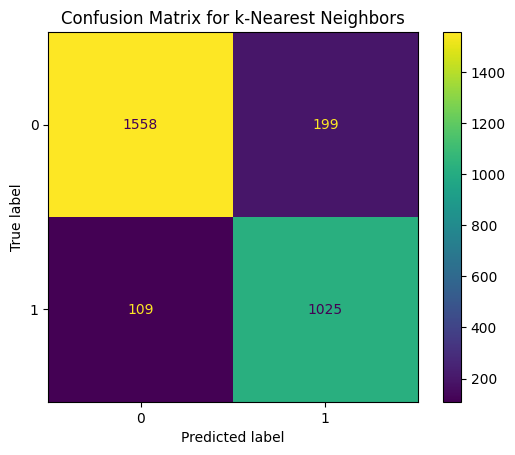

In [139]:
# k-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)
# Generate classification report
knn_report = classification_report(y_test, knn_pred)

plot_confusion_matrix(knn_pred, "k-Nearest Neighbors", knn_accuracy, knn_report)

#### Gradient Boosting

 Using an ensemble approach, gradient boosting develops models one after the other, trying to fix the mistakes of the models that came before it. Utilizing gradient descent to optimize a loss function combines the advantages of several weak learners, usually decision trees. Gradient boosting offers good predictive performance and is quite useful for complicated datasets, but if not correctly tuned, it can be prone to overfitting.

Gradient Boosting Accuracy: 0.91

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1757
           1       0.87      0.91      0.89      1134

    accuracy                           0.91      2891
   macro avg       0.91      0.91      0.91      2891
weighted avg       0.91      0.91      0.91      2891


Confusion Matrix for Gradient Boosting:
[[1600  157]
 [  98 1036]]



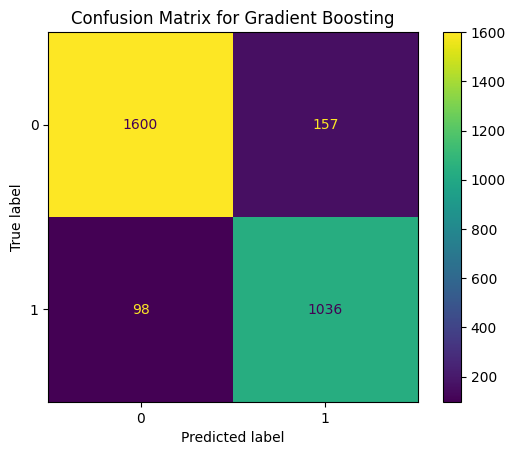

In [140]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# accuracy
gb_accuracy = accuracy_score(y_test, gb_pred)
# Generate classification report
gb_report = classification_report(y_test, gb_pred)

plot_confusion_matrix(gb_pred, "Gradient Boosting", gb_accuracy, gb_report)

 #### Semi-supervised learning

While supervised machine learning algorithms rely on labels to find the relationships between the features and the target, unsupervised algorithms train the model without using any kind of labels for this task.

Just in the middle is Semi-Supervised learning where its data has both a portion that is labeled and unlabeled.

This type of algorithm becomes very useful when there is a considerable number of samples and as the cost and time for labeling the data can be quite high, training a model with just a portion of  labeled data can be the best option (Steen, D., 2020).

**Self-training classifier**

Through the LabelPropagation class in the scikit-learn Python machine learning toolkit, the Label Propagation algorithm is accessible.

Using the fit() method, the model can be fitted similarly to any other classification model, and the predict() function can be used to forecast fresh data.

Crucially, the training dataset supplied to the fit() function needs to contain unlabeled examples with a label of -1 and labelled examples that are unlabeled and integer encoded (as usual).

As part of fitting the model, the model will decide on a label for the unlabeled cases.

The "transduction_" field on the LabelPropagation class provides access to the estimated labels for the labelled and unlabeled data in the training dataset once the model has been fitted.

Total: 5869 Unlabeled: 3527 percent unlabeled: 0.6009541659567218
unlabeled target:
 579    -1
2182    0
6336    1
3011   -1
3479   -1
       ..
5734    1
5191   -1
5390    1
860    -1
7270    1
Name: Rented above mean, Length: 5869, dtype: int64
semi_supervised labels:
 [0 0 1 ... 1 0 1]
Label Propagation Accuracy: 0.93

Classification Report for Label Propagation:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3470
           1       0.90      0.93      0.91      2399

    accuracy                           0.93      5869
   macro avg       0.92      0.93      0.93      5869
weighted avg       0.93      0.93      0.93      5869


Confusion Matrix for Label Propagation:
[[3222  248]
 [ 172 2227]]



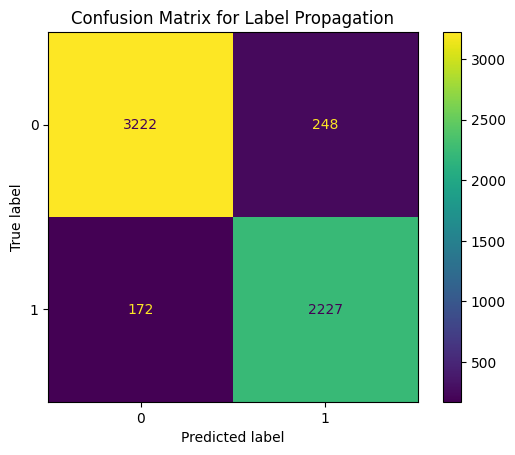

Accuracy score: 0.9284375532458681


In [141]:
y_orig = y_train.copy()

# Create unlabeled data
rng = np.random.RandomState(42)
unlabeled_samples = rng.rand(y_train.shape[0]) < 0.6
print("Total:", y_train.shape[0],
      'Unlabeled:', len(unlabeled_samples[unlabeled_samples == True]),
      'percent unlabeled:', len(unlabeled_samples[unlabeled_samples== True])/unlabeled_samples.shape[0])

y_train[unlabeled_samples] = -1
print("unlabeled target:\n", y_train)

# Semi-supervised labels
#svc = svm.SVC(probability = True, gamma='auto')
lbl = semi_supervised.LabelPropagation()
lbl.fit(X_train, y_train)

y_pred = lbl.predict(X_train)
print("semi_supervised labels:\n", y_pred)

acu = accuracy_score(y_orig, y_pred)
# Generate classification report
ss_report = classification_report(y_orig, y_pred)


plot_confusion_matrix(y_pred, "Label Propagation", acu, ss_report, y_test=y_orig)
print("Accuracy score:", acu)

### 7. Perform a cross-validation technique

In [142]:
# Perform cross-validation
scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print("Cross validation scores for logistic regression:", scores)

Cross validation scores for logistic regression: [0.7836758  0.90981735 0.56849315 0.53710046 0.43550228]


In [143]:
# Perform cross-validation for Support Vector Machine
scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')
print("Cross validation scores for Support Vector Machine:", scores)

Cross validation scores for Support Vector Machine: [0.79851598 0.92579909 0.66894977 0.51940639 0.70890411]


In [144]:
# Perform cross-validation for Decision Tree
scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
print("Cross validation scores for Decision Tree:", scores)

Cross validation scores for Decision Tree: [0.7619863  0.90353881 0.63812785 0.63812785 0.6010274 ]


In [145]:
# Perform cross-validation for Random Forest
scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Cross validation scores for Random Forest:", scores)

Cross validation scores for Random Forest: [0.76255708 0.93607306 0.58789954 0.41609589 0.56506849]


In [146]:
# Perform cross-validation K-Nearest Neighbors
scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')
print("Cross validation scores for K-Nearest Neighbors:", scores)

Cross validation scores for K-Nearest Neighbors: [0.79794521 0.93778539 0.60559361 0.57191781 0.64212329]


In [147]:
# Perform cross-validation for Gradient Boosting
scores = cross_val_score(gb_model, X, y, cv=5, scoring='accuracy')
print("Cross validation scores for Gradient Boosting:", scores)

Cross validation scores for Gradient Boosting: [0.82990868 0.96461187 0.59874429 0.52739726 0.78652968]


#### Semi-supervised learning

In [148]:
# Perform cross-validation for the semi-supervised model 
scores = cross_val_score(lbl, X, y, cv=5, scoring='accuracy')
print("Cross validation scores for Semi-supervised algorithm:", scores)

Cross validation scores for Semi-supervised algorithm: [0.78995434 0.91609589 0.5913242  0.54452055 0.62728311]


## VIII) Data Visualization

Apart from the visualizations already seen, we can visualize the frequency of the numerical data and the percentage of each class from the categorical variables. Moreover, we can visualize the results of the predicted values from our model versus the real test values having in the X axis each of the features from our dataset, so we can make sure that the model has adjusted appropriately the input data to the target variable and performs an accurate prediction in all of the dimensions of the problem.

<function matplotlib.pyplot.show(close=None, block=None)>

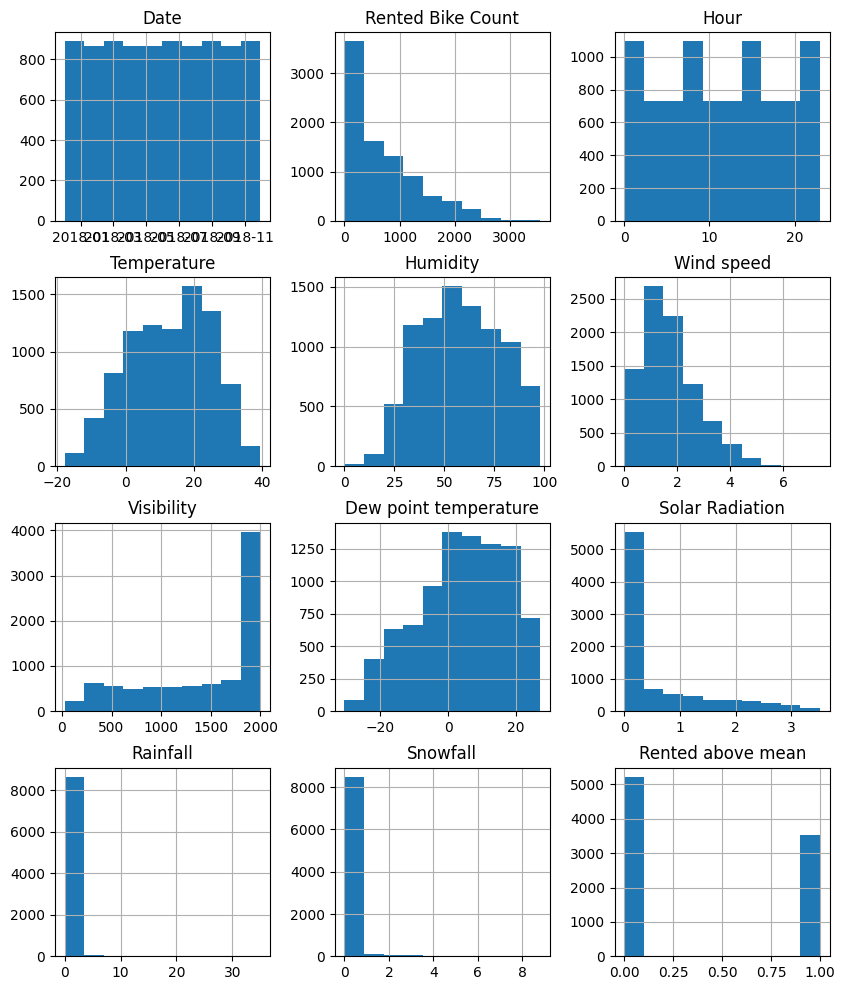

In [149]:
df.hist(figsize=(10,12))
plt.show

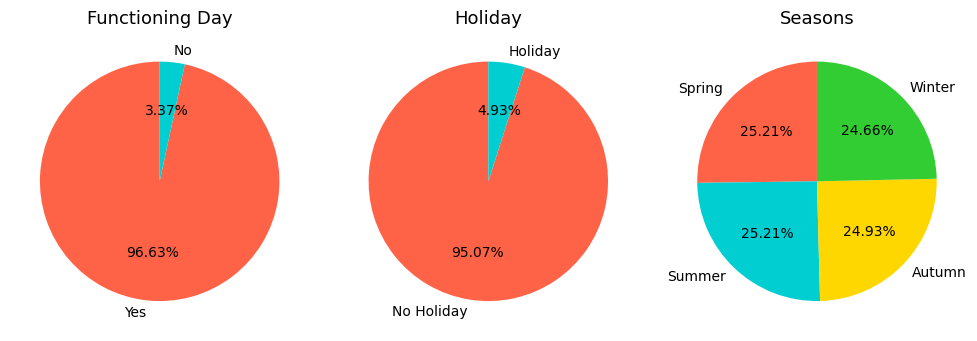

In [150]:
# Create a figure with 2 rows and 2 columns (adjust as needed)
fig, axes = plt.subplots(1, 3, figsize=(10, 10))  # Adjust figsize for better visualization

# Plot pie chart for 'Functioning Day' (existing code)
gen_count = df['Functioning Day'].value_counts()
axes[0].pie(gen_count, labels=gen_count.index, autopct='%1.2f%%', startangle=90, colors=['#FF6347', '#00CED1'])
axes[0].set_title('Functioning Day', fontsize=13, fontweight='normal')

# Plot pie chart for Holiday
var1_counts = df['Holiday'].value_counts()
axes[1].pie(var1_counts, labels=var1_counts.index, autopct='%1.2f%%', startangle=90, colors=['#FF6347', '#00CED1'])
axes[1].set_title('Holiday', fontsize=13, fontweight='normal')

# Plot pie chart for Seasons
var2_counts = df['Seasons'].value_counts()
axes[2].pie(var2_counts, labels=var2_counts.index, autopct='%1.2f%%', startangle=90, colors=['#FF6347', '#00CED1', '#FFD700', '#32CD32'])
axes[2].set_title('Seasons', fontsize=13, fontweight='normal')

# Customize the layout 
plt.tight_layout()  # Adjust spacing between subplots

plt.show()

## IX) Utilization of Analysis Results

**Based on the Confusion Matrix Pattern:**

* Class 0 (non-peak days): All the models are very active in defining the non-peak days as all the models have high precision.
* Class 1 (peak days): Only Gradient Boosting and Random Forest have higher precision, and recall, which depicts that they perform very well in detecting peak days as compared to other models. 

**Based on Accuracy:**

Only the random and gradient Boosting have the highest accuracy (0.92%), followed by the semi-supervised algorithm (0.91%), whereas the support vector Machine achieved the lowest accuracy (0.85%)
Decision tree is a good substitute option if random forest, and gradient forest is not deployed because it also performs well with an accuracy of (0.90%). However, logistic regression and KNN perform moderately; therefore, they are appropriate only for predicting peaks.


**To conclude:**

As our main objective is to predict the peak days efficiently to warn the company, the models (Random Forest and Gradient Boosting) with higher precision, and accuracy are ideal for choosing as they perform well at finding the peak days which is important for providing recent timely alerts.

**Recommendation:**

Gradient Boosting is the ideal match for deploying as it performs slightly better in predicting the peak days also if we look into overall performance whichever model is decided to choose to make sure that they are tested in real-life scenarios to authenticate its performance before depending upon its for executive decisions.

If the company doesn't have the economic capacity to pay for the labeling service or neither the time, Semi-supervised learning suppose a good alternative as it showed a good performance both in accuracy, f1 score and in general working with different batchs of the data (which can be seen in the cross-validation)


 


## References

 [1] E, S. V., Park, J., & Cho, Y. (2020). Using data mining techniques for bike sharing demand prediction in metropolitan city. Computer Communications, 153, 353–366. https://doi.org/10.1016/j.comcom.2020.02.007
 
 [2] LogisticRegression. scikit learn. (n.d.) https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

 [3] SVC. scikit learn. (n.d.) https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

 [4] K-Nearest Neighbor(KNN) Algorithm. (2024, July 15). GeeksforGeeks. https://www.geeksforgeeks.org/k-nearest-neighbours/ 

 [5] Dutta, A. (2023, December 6). Random Forest regression in python. GeeksforGeeks. https://www.geeksforgeeks.org/random-forest-regression-in-python/ 

 [6] Slatery, K. (2020, March 14). Decision trees: Understanding the basis of Ensemble Methods. Medium. https://towardsdatascience.com/decision-trees-understanding-the-basis-of-ensemble-methods-e075d5bfa704 

 [7] Gradient Boosting in ML. (2024, July 15). GeeksforGeeks. https://www.geeksforgeeks.org/ml-gradient-boosting/

 [8] Steen, D. (2020, August 31). A gentle introduction to self-training and semi-supervised learning. Medium. https://towardsdatascience.com/a-gentle-introduction-to-self-training-and-semi-supervised-learning-ceee73178b38 

 [9] Brownlee, J. (2020, December 27). Semi-supervised learning with label Propagation. MachineLearningMastery.com. https://machinelearningmastery.com/semi-supervised-learning-with-label-propagation/ 

 [10] 3.1. cross-validation: Evaluating estimator performance. scikit learn. (n.d.). https://scikit-learn.org/stable/modules/cross_validation.html 

